In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


/var/folders/lq/nhdt366s1xl9t9mjlvj7g6zc0000gn/T/ipykernel_26798/1329931665.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Generate a sample dataset (you would typically load your own dataset)
data = {'X1': [16, 50, 44, 64, 26, 17, 37, 2, 53, 67],
        'X2': [4420, 3481, 2909, 3016, 4534, 4052, 4471, 2400, 2787, 4201],
        'Y': [99268, 37816, 12832, 46278, 35950, 62765, 86948, 84551, 22883, 87098]
        }


df = pd.DataFrame(data)


In [3]:

# Split the data into independent variables (X) and the dependent variable (Y)
X = df[['X1', 'X2']]
Y = df['Y']

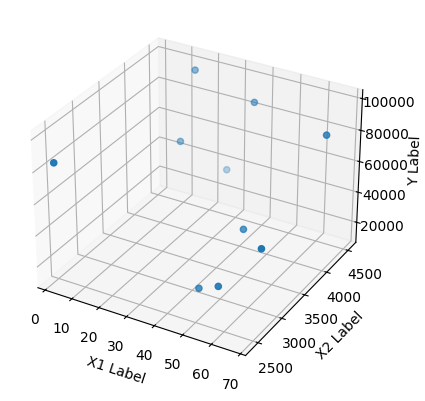

In [4]:
# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X['X1'], X['X2'], Y)

# Setting labels
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

# Show the plot
plt.show()

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
# Create a linear regression model
model = LinearRegression()

In [7]:
# Fit the model to the training data
model.fit(X_train, Y_train)

LinearRegression()

In [8]:
# Make predictions on the test set
Y_pred = model.predict(X_test) 

In [9]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 20683.61001883511
Mean Squared Error: 435750784.86044925
Root Mean Squared Error: 20874.644544529358


In [10]:
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-351.47376542   11.87796927]
Intercept: 31908.45325487041


/Users/fakhri/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


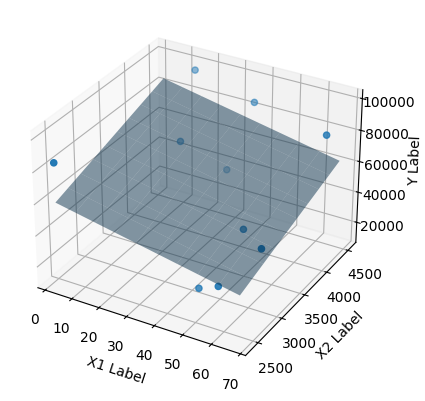

In [11]:
# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X['X1'], X['X2'], Y)

# Fit plane plot
# 1. Generate a grid of points to visualize the plane
x1_grid, x2_grid = np.meshgrid(np.linspace(X['X1'].min(), X['X1'].max(), 10),
                                np.linspace(X['X2'].min(), X['X2'].max(), 10))

# 2. Predict Y values for the grid points
y_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
y_grid = y_grid.reshape(x1_grid.shape)

# 3. Plot the plane
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)

# Setting labels
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

# Show the plot
plt.show()